Let's we interested in Ethereum, and Dogecoin and Bitcoin based on portfolio optimization and we want to predict the near future of the prices of these cryptocurrencies.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

## Import data

In [2]:
crypto = pd.read_csv("cryptocurrencies_historical_data")

crypto = crypto.set_index('Date')

crypto.index = pd.to_datetime(crypto.index)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-03 to 2023-07-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTCUSDT   1095 non-null   float64
 1   ETHUSDT   1095 non-null   float64
 2   XRPUSDT   1095 non-null   float64
 3   DOGEUSDT  1095 non-null   float64
 4   LTCUSDT   1095 non-null   float64
 5   ADAUSDT   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


## Data Exploration Cryptocurrencies

In [3]:
crypto = crypto[["BTCUSDT", "ETHUSDT", "DOGEUSDT"]]

crypto.head(5)

,BTCUSDT,ETHUSDT,DOGEUSDT
Date,,,
2020-07-03,9058.26,224.87,0.002314
2020-07-04,9135.46,229.17,0.002301
2020-07-05,9069.41,227.56,0.002303
2020-07-06,9344.20,241.60,0.002619
2020-07-07,9257.39,239.39,0.003136


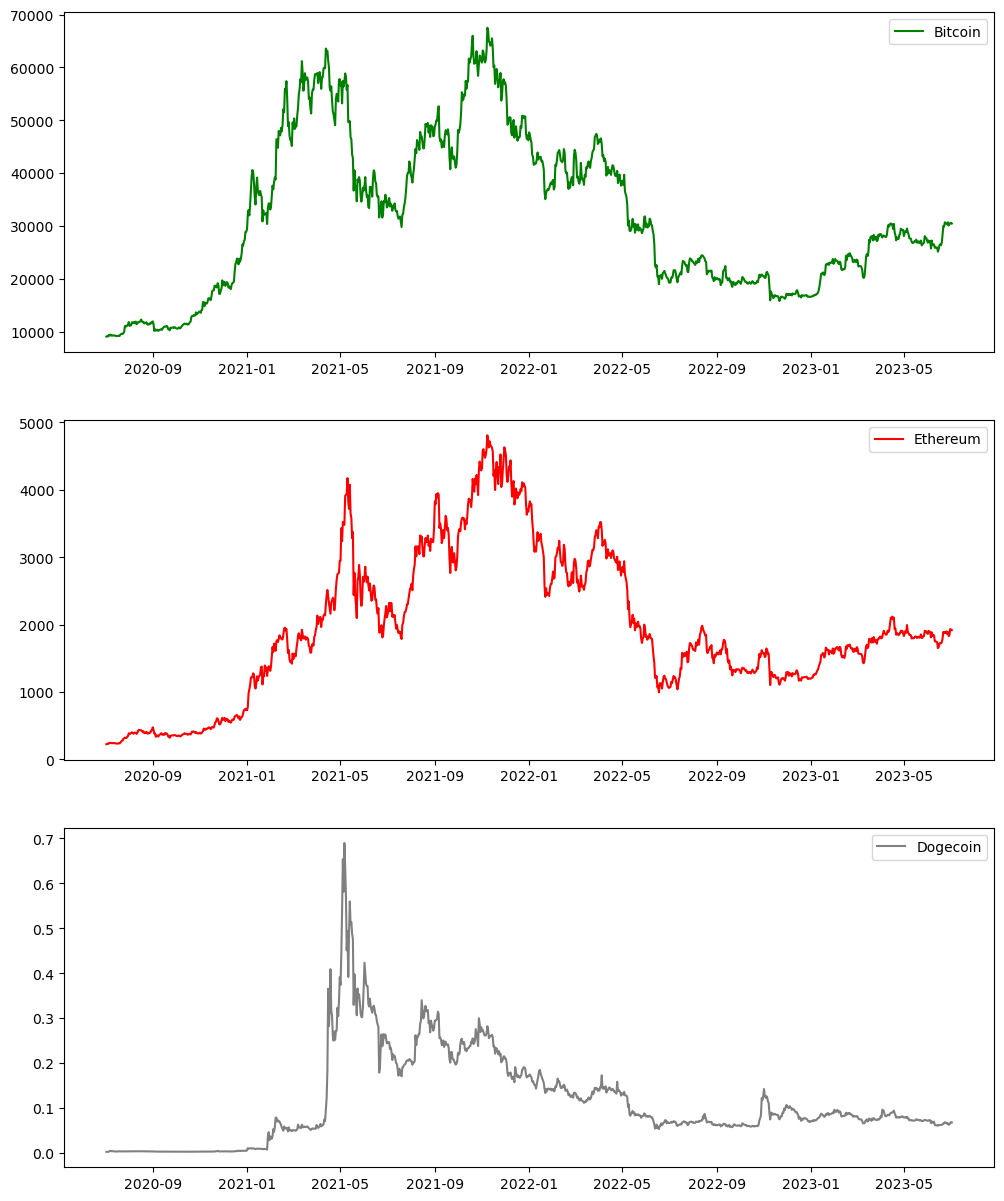

In [4]:
# Visualize prices

fig, axs = plt.subplots(3, 1, figsize = (12, 15))

axs[0].plot(crypto["BTCUSDT"], label = "Bitcoin", color = "green")
axs[1].plot(crypto["ETHUSDT"], label = "Ethereum", color = "red")
axs[2].plot(crypto["DOGEUSDT"], label = "Dogecoin", color = "grey")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

In [5]:
crypto.describe().T

,count,mean,std,min,25%,50%,75%,max
BTCUSDT,1095.0,31748.967342,14769.104040,9058.260000,19662.475000,29091.88000,42949.1900,67525.83000
ETHUSDT,1095.0,1946.458932,1087.852568,224.870000,1252.235000,1792.22000,2700.2850,4807.98000
DOGEUSDT,1095.0,0.114271,0.104135,0.002301,0.058655,0.07919,0.1607,0.68982


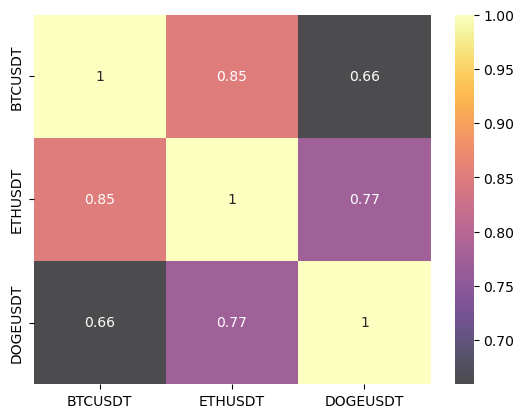

In [6]:
# Let's do correlation analysis again.

correlation = crypto.corr()

sns.heatmap(correlation, annot = True, cmap = 'inferno', alpha = 0.7)

plt.show()

### Decomposition analysis

In [49]:
def decomposition(data, method = str):
    
    decomposition = sm.tsa.seasonal_decompose(data, model = method)
    
    trend = decomposition.trend
    
    seasonality = decomposition.seasonal
    
    resid = decomposition.resid
    
    fig, axs = plt.subplots(4, 1, figsize = (10, 16))
    
    axs[0].plot(data, label = "Original Data", color = "grey")
    axs[1].plot(trend, label = "Trend", color = "grey")
    axs[2].plot(seasonality, label = "Seasonal", color = "grey")
    axs[3].plot(resid, label = "Residuals", color = "grey")
    
    axs_ = [0, 1, 2, 3]
    
    for ax in axs_:
        axs[ax].legend()
    


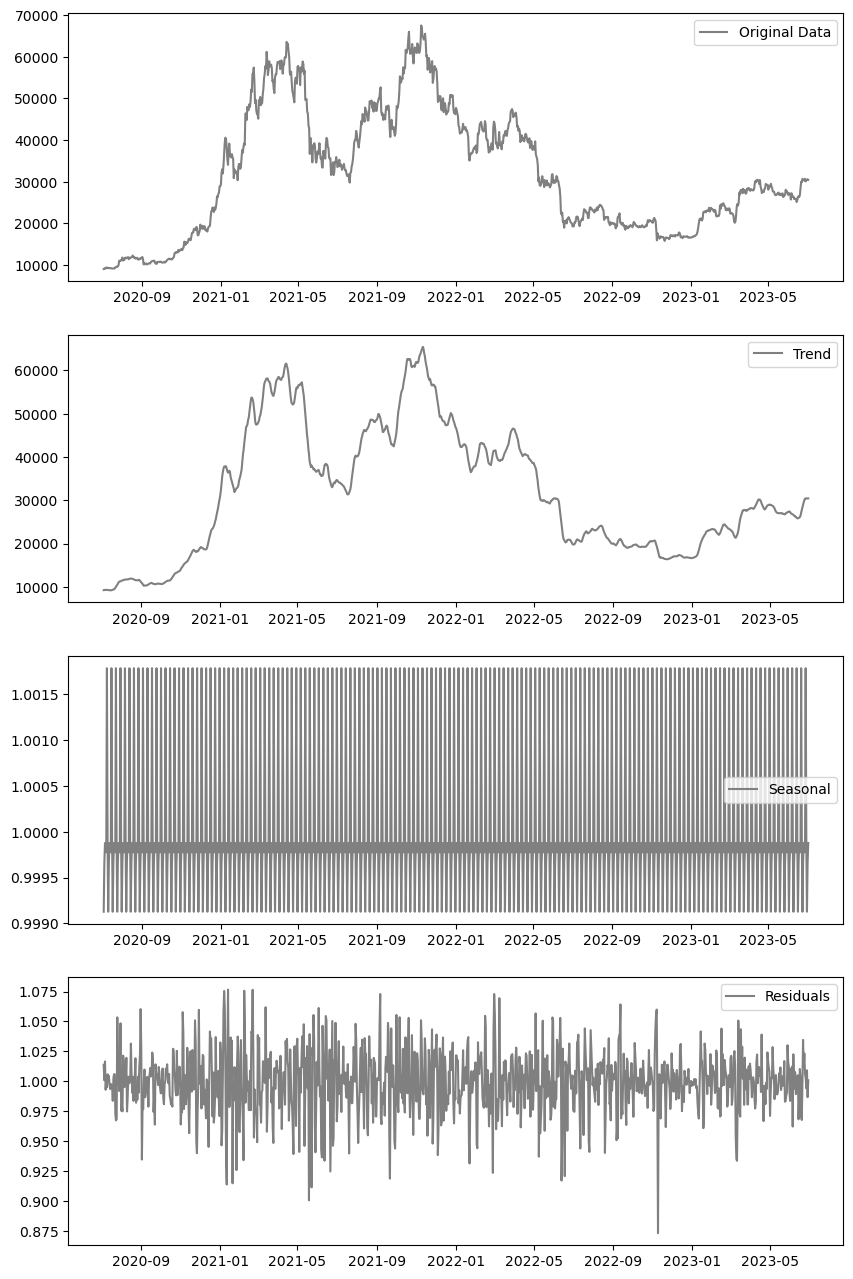

In [50]:
decomposition(crypto["BTCUSDT"], method = "multiplicative")

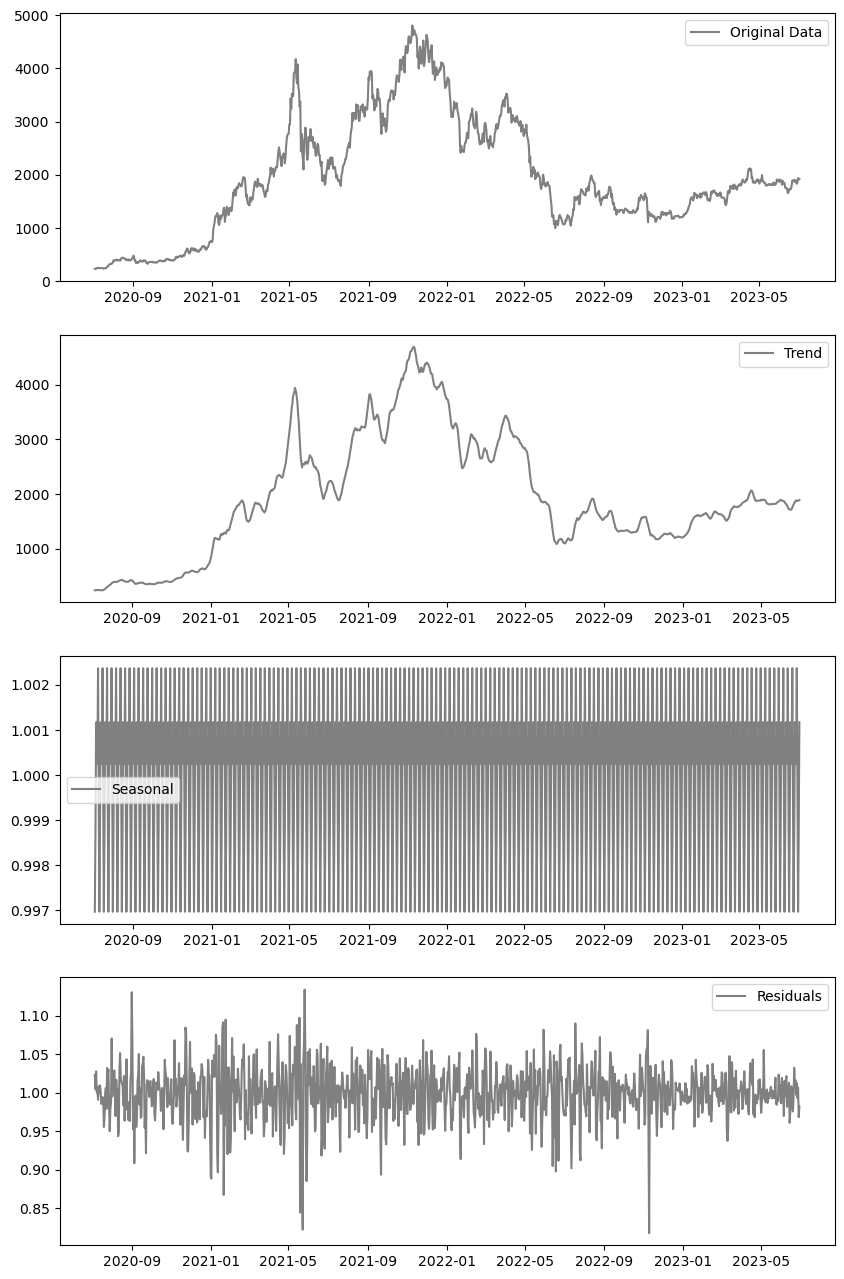

In [51]:
decomposition(crypto["ETHUSDT"], method = "multiplicative")

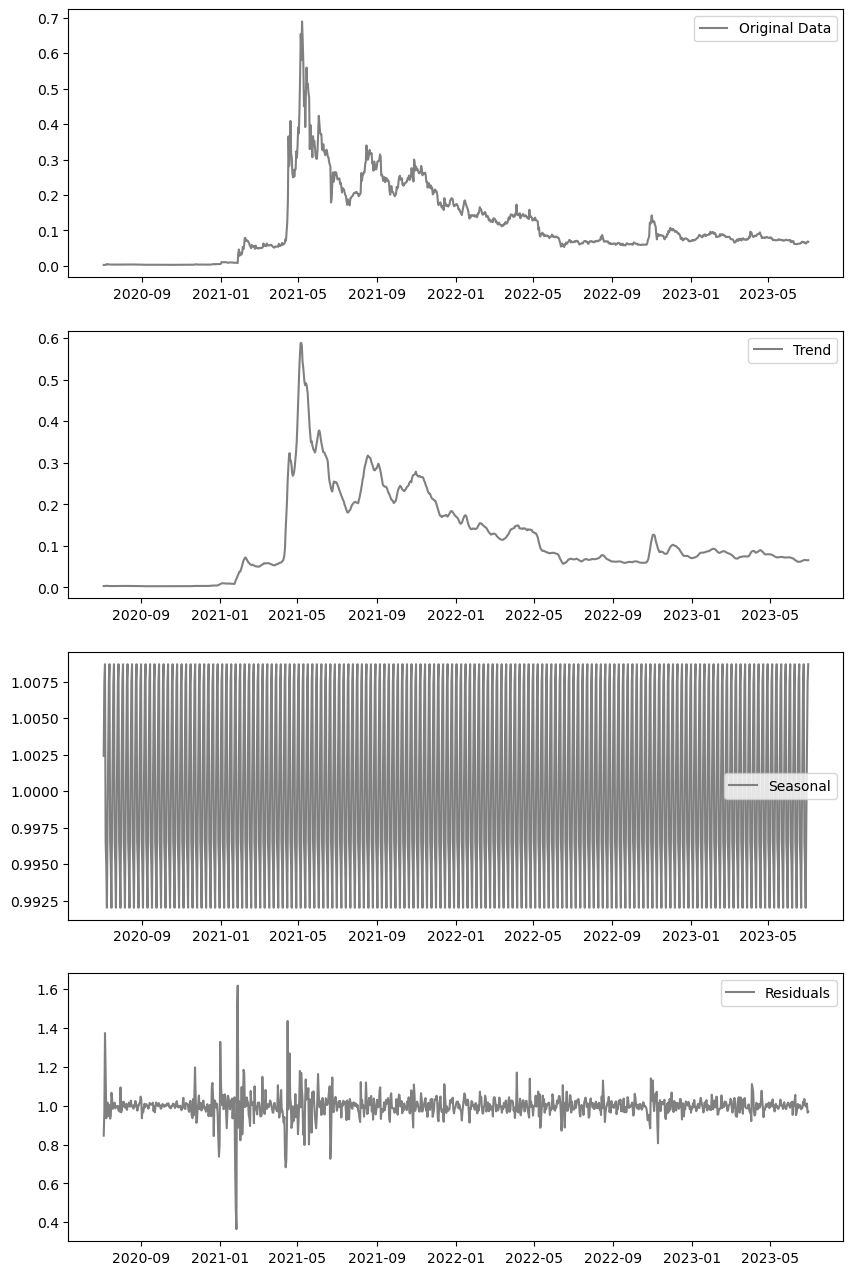

In [52]:
decomposition(crypto["DOGEUSDT"], method = "multiplicative")

### Stationary Check:

Simply, a stationary time series is one whose mean, variance, and autocovariance remain constant over time.

Stationary is an important assumption in many time series models and analyses because it simplifies the mathematical calculations and allows for the use of various statistical tools and techniques.

In practice, it is often tested by using stationary tests such as the Augmented Dickey Fuller(ADF) test or the KPSS(Kwiatkowski-Phillips-Schmidt-Shin) test to ensure that the data meet the necessary assumptions. 

If a time series is found to be non stationary, it may require transformation or/and differencing to make it stationary before applying certain models or analyses.

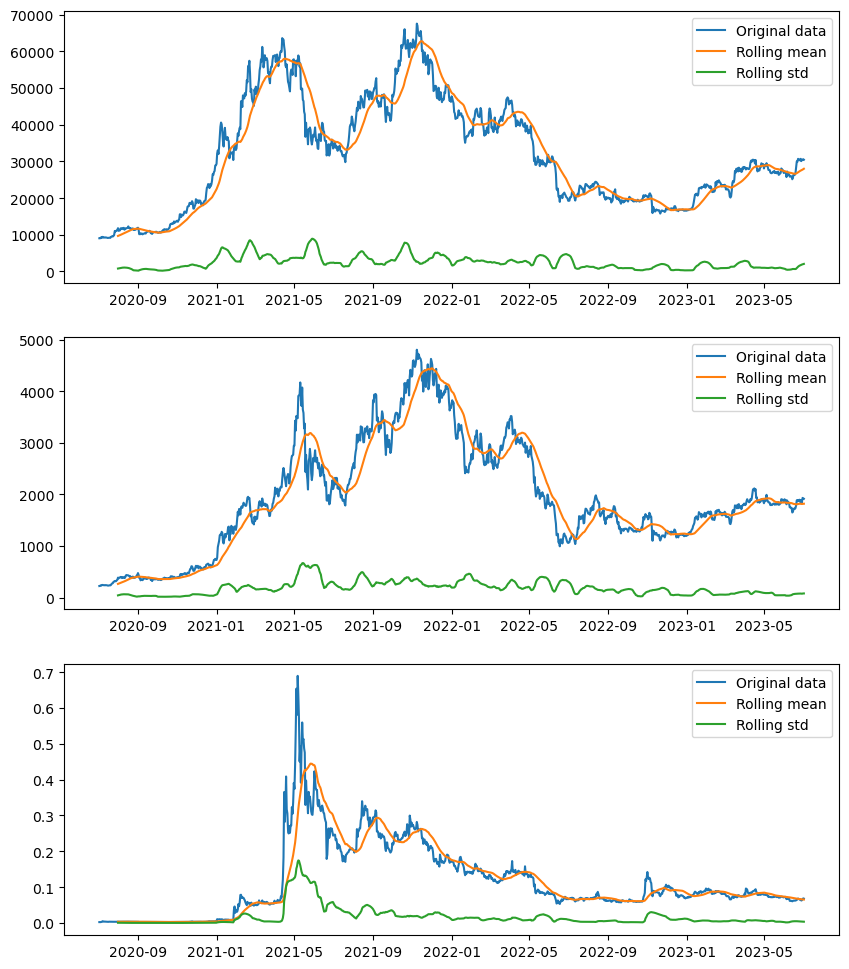

In [41]:
rolling_mean = crypto.rolling(window = 30).mean()

rolling_std = crypto.rolling(window = 30).std()

fig, axs = plt.subplots(3, 1, figsize = (10, 12))


axs[0].plot(crypto["BTCUSDT"], label = "Original data")
axs[0].plot(rolling_mean["BTCUSDT"], label = "Rolling mean")
axs[0].plot(rolling_std["BTCUSDT"], label = "Rolling std")

axs[1].plot(crypto["ETHUSDT"], label = "Original data")
axs[1].plot(rolling_mean["ETHUSDT"], label = "Rolling mean")
axs[1].plot(rolling_std["ETHUSDT"], label = "Rolling std")

axs[2].plot(crypto["DOGEUSDT"], label = "Original data")
axs[2].plot(rolling_mean["DOGEUSDT"], label = "Rolling mean")
axs[2].plot(rolling_std["DOGEUSDT"], label = "Rolling std")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

<b>ADF test:</b>
* <b>Null Hypothesis :</b> The null hypothesis assumes the presence of a unit root, indicating non-stationary in the time series.
* <b>Alternative Hypothesis :</b> The alternative hypothesis assumes the absence(yokluk) of a unit root, indicating stationary in time series.

If the p-value is less than a chosen significant level(e.g., 0.05 ) we reject the null hypothesis and conclude that the series is stationary. A smaller p-value provides stronger evidence against the null hypothesis.

In [23]:
# Adfuller test to check stationary.

coins = list(crypto.columns)

for coin in coins:
    
    result = adfuller(crypto[coin])
    print(coin)
    print("Test Statistic : {}".format(result[0]))
    print("p-value : {}".format(result[1]))
    print("Number of lags used : {}".format(result[2]))
    print("Number of Observations : {}".format(result[3]))
    print("Critical Values : {}".format(result[4:]))
    print("\n------------\n")

BTCUSDT
Test Statistic : -1.8591918069753555
p-value : 0.3514952126190173
Number of lags used : 0
Number of Observations : 1094
Critical Values : ({'1%': -3.436341508283391, '5%': -2.864185524365606, '10%': -2.5681785627437677}, 18432.616555508426)

------------

ETHUSDT
Test Statistic : -2.006739067914047
p-value : 0.2836260926150609
Number of lags used : 6
Number of Observations : 1088
Critical Values : ({'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}, 13002.89935638694)

------------

DOGEUSDT
Test Statistic : -2.680716050674768
p-value : 0.07743509173538396
Number of lags used : 19
Number of Observations : 1075
Critical Values : ({'1%': -3.4364476591811033, '5%': -2.864232347211692, '10%': -2.5682035004867494}, -5983.668286454763)

------------



#### Interpretation :

* <b>BTCUSDT(Bitcoin)</b>, p-value is greater than the significance level and the test statistic not being more negative than the critical values. we cannot reject the null hypothesis of non-stationarity for the BTCUSDT time series. It suggests that the BTCUSDT series is likely non-stationary.

* <b>ETHUSDT(Ethereum)</b>, p-value is greater than the significance level, and the test statistic is less negative than the critical values, suggesting weak evidence against the null hypothesis of non-stationarity.

* <b>DOGEUSDT(Dogecoin)</b>,  The p-value is above the significance level, but the test statistic is more negative than the critical values, indicating somewhat stronger evidence against non-stationarity.


Based on the ADF test results, the BTCUSDT, ETHUSDT, and DOGEUSDT time series are likely non-stationary.

## Data Preparation

In [54]:
# First order differencing to remove trends and achieve stationary 
differenced_crypto = crypto.diff(1).dropna()

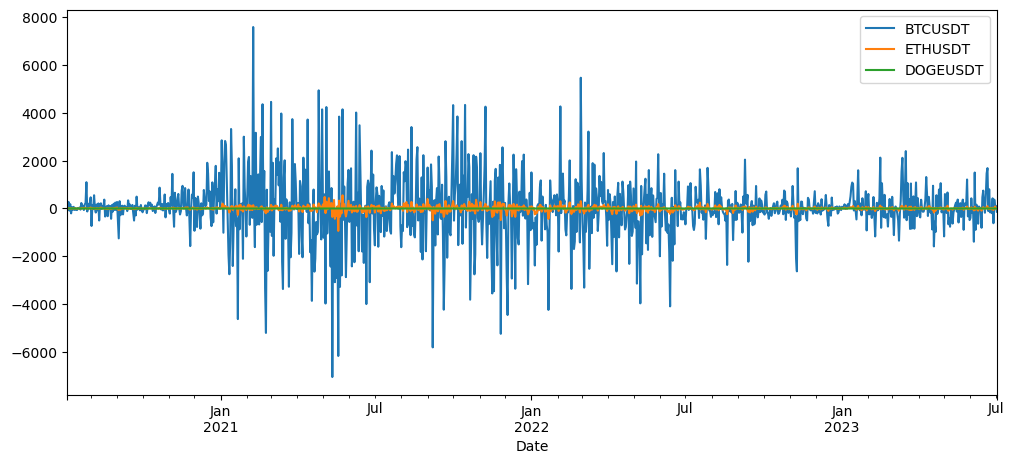

In [32]:
# Transformed Data.

differenced_crypto.plot(figsize = (12, 5))

plt.show()

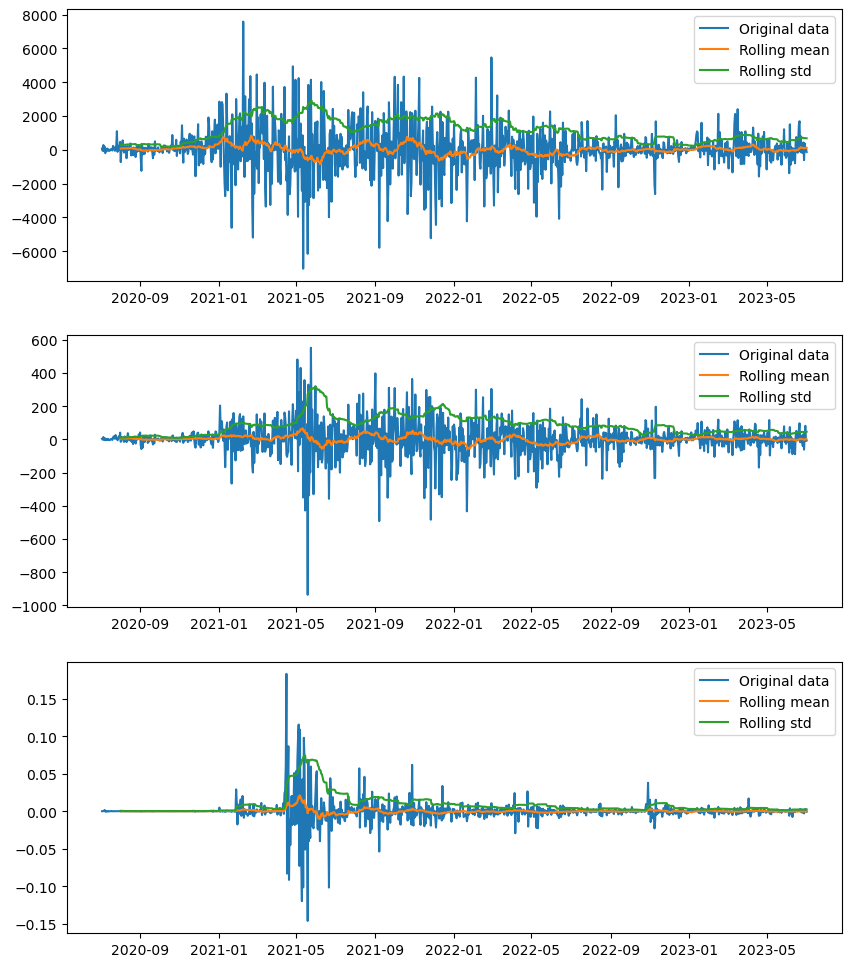

In [53]:
rolling_mean = differenced_crypto.rolling(window = 30).mean()

rolling_std = differenced_crypto.rolling(window = 30).std()

fig, axs = plt.subplots(3, 1, figsize = (10, 12))


axs[0].plot(differenced_crypto["BTCUSDT"], label = "Original data")
axs[0].plot(rolling_mean["BTCUSDT"], label = "Rolling mean")
axs[0].plot(rolling_std["BTCUSDT"], label = "Rolling std")

axs[1].plot(differenced_crypto["ETHUSDT"], label = "Original data")
axs[1].plot(rolling_mean["ETHUSDT"], label = "Rolling mean")
axs[1].plot(rolling_std["ETHUSDT"], label = "Rolling std")

axs[2].plot(differenced_crypto["DOGEUSDT"], label = "Original data")
axs[2].plot(rolling_mean["DOGEUSDT"], label = "Rolling mean")
axs[2].plot(rolling_std["DOGEUSDT"], label = "Rolling std")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

In [55]:
# Adfuller test to check stationary again.

coins = list(differenced_crypto.columns)

for coin in coins:
    
    result = adfuller(differenced_crypto[coin])
    print(coin)
    print("Test Statistic : {}".format(result[0]))
    print("p-value : {}".format(result[1]))
    print("Number of lags used : {}".format(result[2]))
    print("Number of Observations : {}".format(result[3]))
    print("Critical Values : {}".format(result[4:]))
    print("\n------------\n")

BTCUSDT
Test Statistic : -34.23829783583085
p-value : 0.0
Number of lags used : 0
Number of Observations : 1093
Critical Values : ({'1%': -3.4363470029475525, '5%': -2.864187948086107, '10%': -2.568179853605536}, 18418.545214742873)

------------

ETHUSDT
Test Statistic : -12.526731422569247
p-value : 2.4792082682996222e-23
Number of lags used : 5
Number of Observations : 1088
Critical Values : ({'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}, 12993.847044032223)

------------

DOGEUSDT
Test Statistic : -6.8065955899885315
p-value : 2.1688444059822114e-09
Number of lags used : 22
Number of Observations : 1071
Critical Values : ({'1%': -3.436470487817901, '5%': -2.8642424166404, '10%': -2.5682088634756735}, -5971.9315933390035)

------------



#### Interpretation :

After first order differencing: 

* <b>BTCUSDT(Bitcoin)</b>, Based on the highly negative test statistic and the p-value being close to zero, we can confidently reject the null hypothesis of non-stationarity for the differenced BTCUSDT time series. It suggests that the differenced series is likely stationary.


* <b>For both ETHUSDT(Ethereum) and DOGEUSDT(Dogecoin)</b>, The highly negative test statistics and very low p-values provide strong evidence against the null hypothesis of non-stationarity for the differenced series. Therefore, we can conclude that the differenced ETHUSDT and DOGEUSDT time series are likely stationary.